## Clustering with PCA

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

### Data Loading

In [2]:
data = pd.read_csv('College_Data.csv')
data.head(5)

,Unnamed: 0,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
data.shape

(777, 18)

### Cek Duplicate Country

In [4]:
data=data.drop_duplicates(subset=["Unnamed: 0"])
data.shape

(777, 18)

### Data Understanding

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [6]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Data Cleaning

In [7]:
data.isnull().sum()

Unnamed: 0     0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Exploratory Data Analytics

In [8]:
data = data.rename(columns= {'Unnamed: 0' : 'college'})
data

,college,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


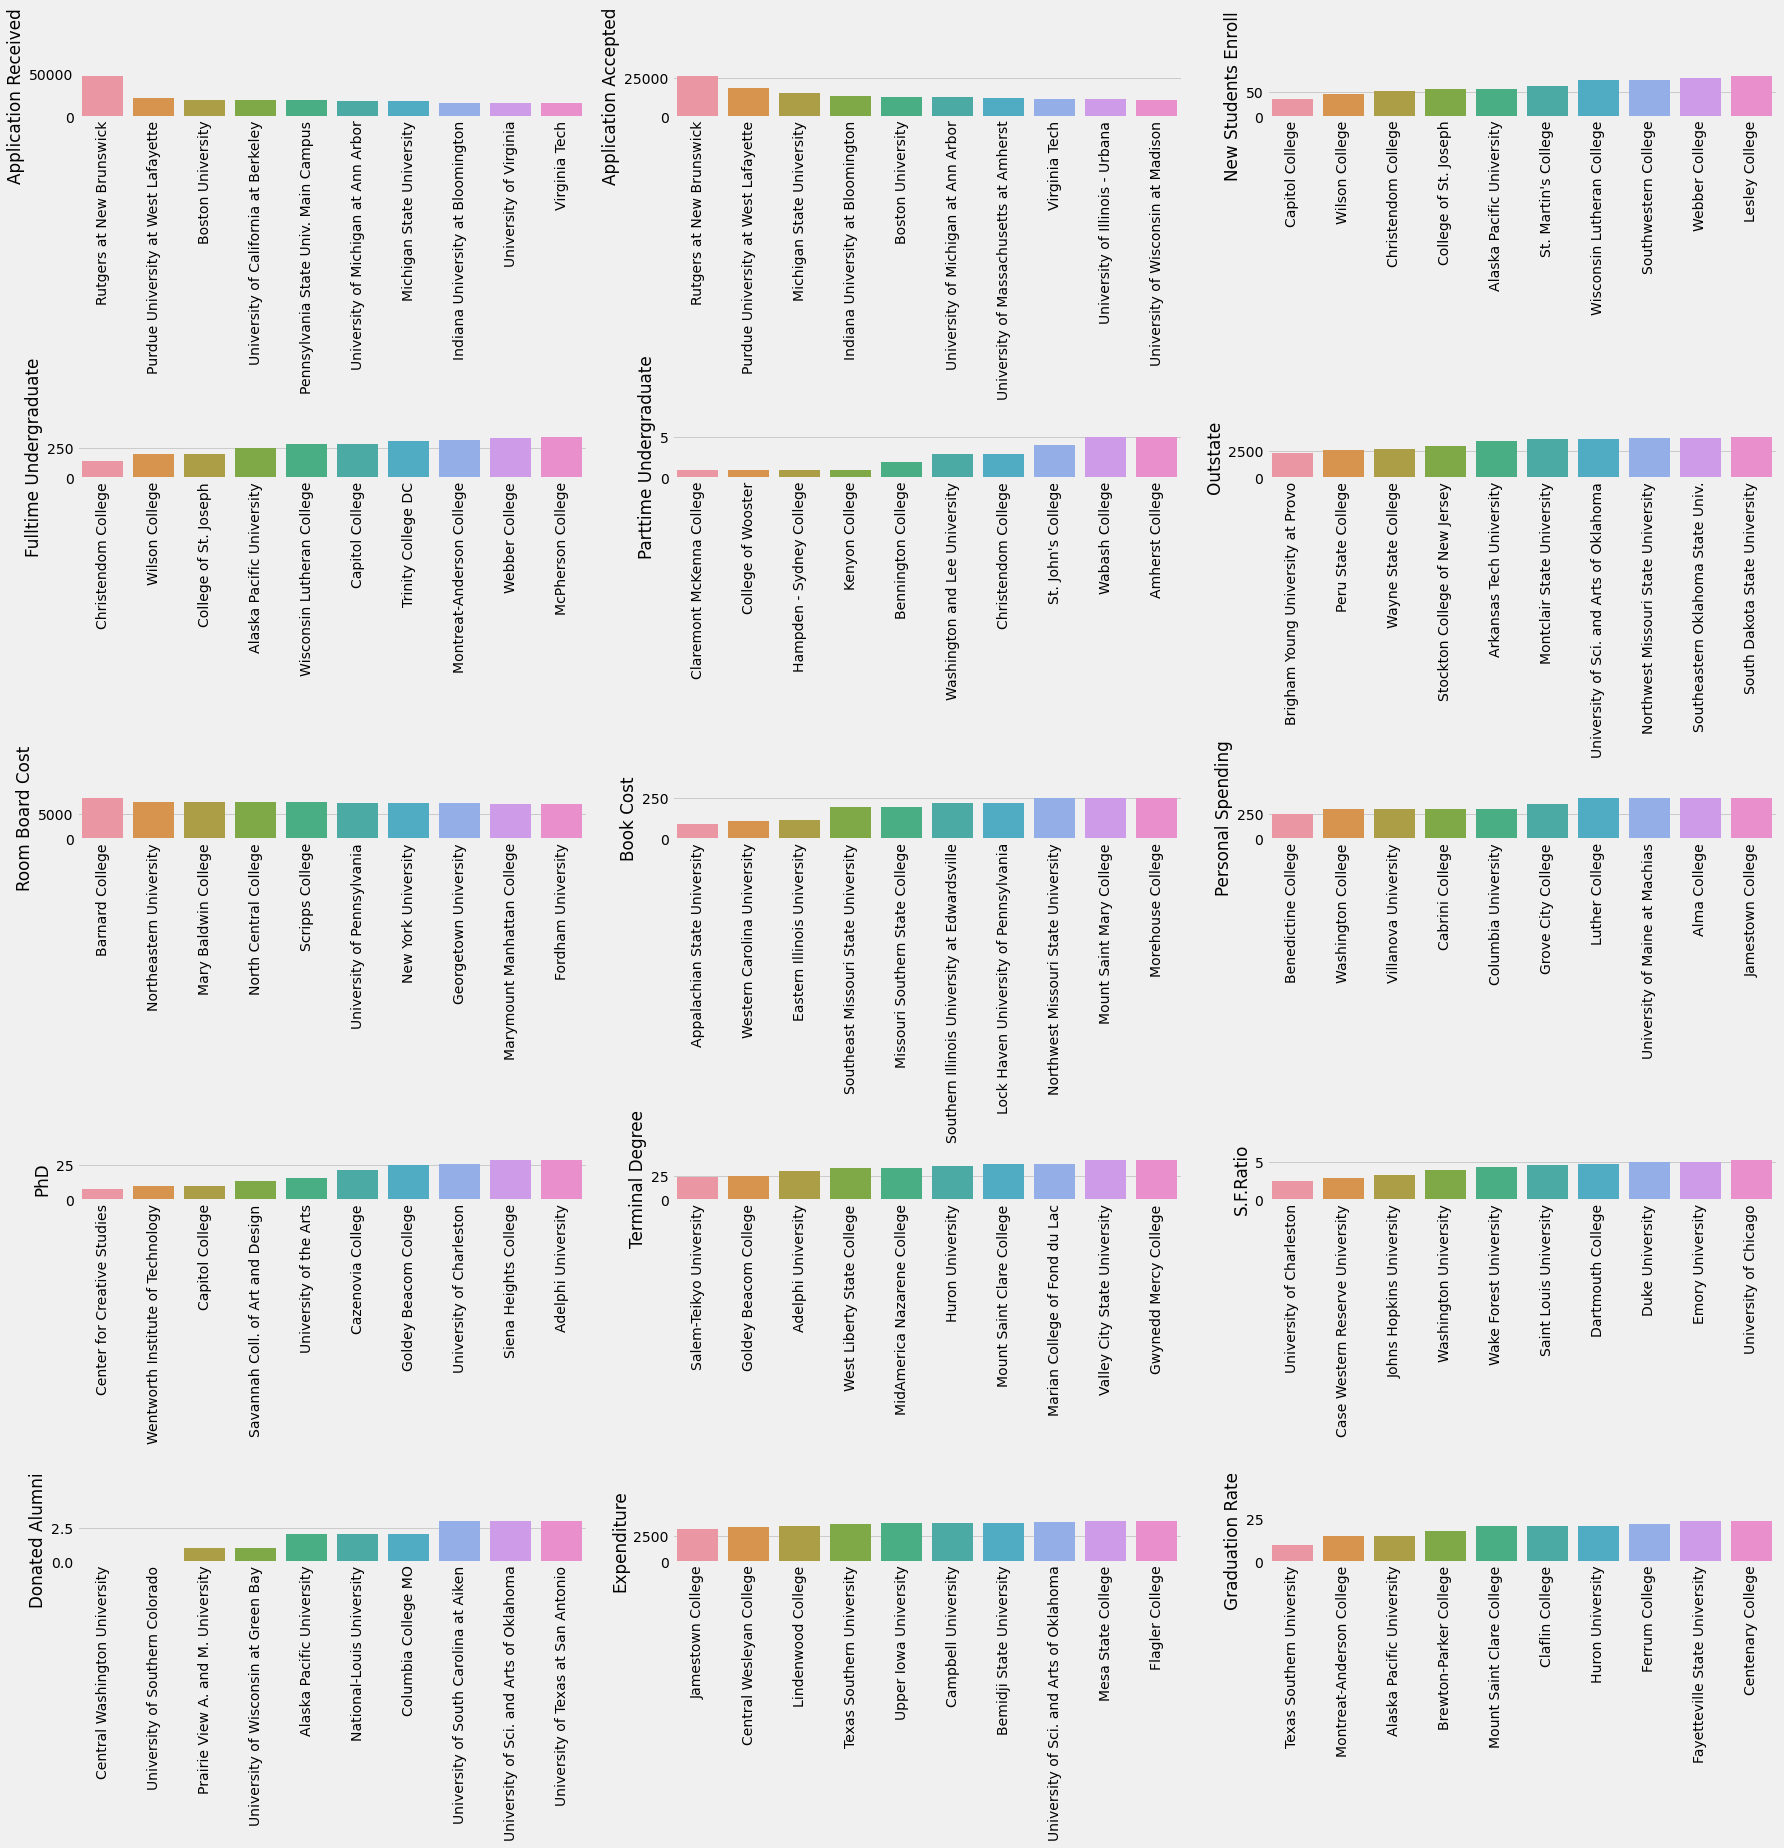

In [9]:
fig, axs = plt.subplots(5,3,figsize = (25,25))



top10_apps = data[['college','Apps']].sort_values('Apps', ascending = False).head(10)
plt1 = sns.barplot(x='college', y='Apps', data= top10_apps, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Application Received')


top10_accept = data[['college','Accept']].sort_values('Accept', ascending = False).head(10)
plt1 = sns.barplot(x='college', y='Accept', data= top10_accept, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Application Accepted')


top10_enroll = data[['college','Enroll']].sort_values('Enroll', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='Enroll', data= top10_enroll, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'New Students Enroll')


top10_fug = data[['college','F.Undergrad']].sort_values('F.Undergrad', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='F.Undergrad', data= top10_fug, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Fulltime Undergraduate')


top10_pug = data[['college','P.Undergrad']].sort_values('P.Undergrad', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='P.Undergrad', data= top10_pug, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'Parttime Undergraduate')


top10_outstate = data[['college','Outstate']].sort_values('Outstate', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='Outstate', data= top10_outstate, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Outstate')


top10_roomboard = data[['college','Room.Board']].sort_values('Room.Board', ascending = False).head(10)
plt1 = sns.barplot(x='college', y='Room.Board', data= top10_roomboard, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Room Board Cost')


top10_book = data[['college','Books']].sort_values('Books', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='Books', data= top10_book, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Book Cost')


top10_personal = data[['college','Personal']].sort_values('Personal', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='Personal', data= top10_personal, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Personal Spending')


top10_phd = data[['college','PhD']].sort_values('PhD', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='PhD', data= top10_phd, ax = axs[3,0])
plt1.set(xlabel = '', ylabel= 'PhD')


top10_terminal = data[['college','Terminal']].sort_values('Terminal', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='Terminal', data= top10_terminal, ax = axs[3,1])
plt1.set(xlabel = '', ylabel= 'Terminal Degree')


top10_ratio = data[['college','S.F.Ratio']].sort_values('S.F.Ratio', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='S.F.Ratio', data= top10_ratio, ax = axs[3,2])
plt1.set(xlabel = '', ylabel= 'S.F.Ratio')


top10_alumni = data[['college','perc.alumni']].sort_values('perc.alumni', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='perc.alumni', data= top10_alumni, ax = axs[4,0])
plt1.set(xlabel = '', ylabel= 'Donated Alumni')


top10_expend = data[['college','Expend']].sort_values('Expend', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='Expend', data= top10_expend, ax = axs[4,1])
plt1.set(xlabel = '', ylabel= 'Expenditure')


top10_grad = data[['college','Grad.Rate']].sort_values('Grad.Rate', ascending = True).head(10)
plt1 = sns.barplot(x='college', y='Grad.Rate', data= top10_grad, ax = axs[4,2])
plt1.set(xlabel = '', ylabel= 'Graduation Rate')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

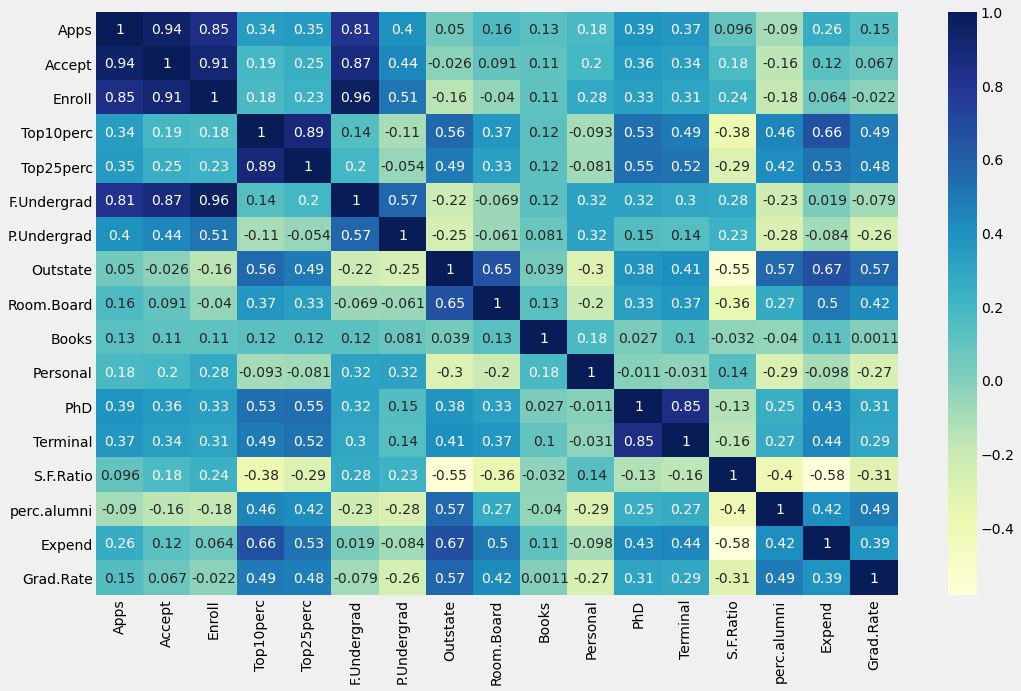

In [10]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Outlier Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   college      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

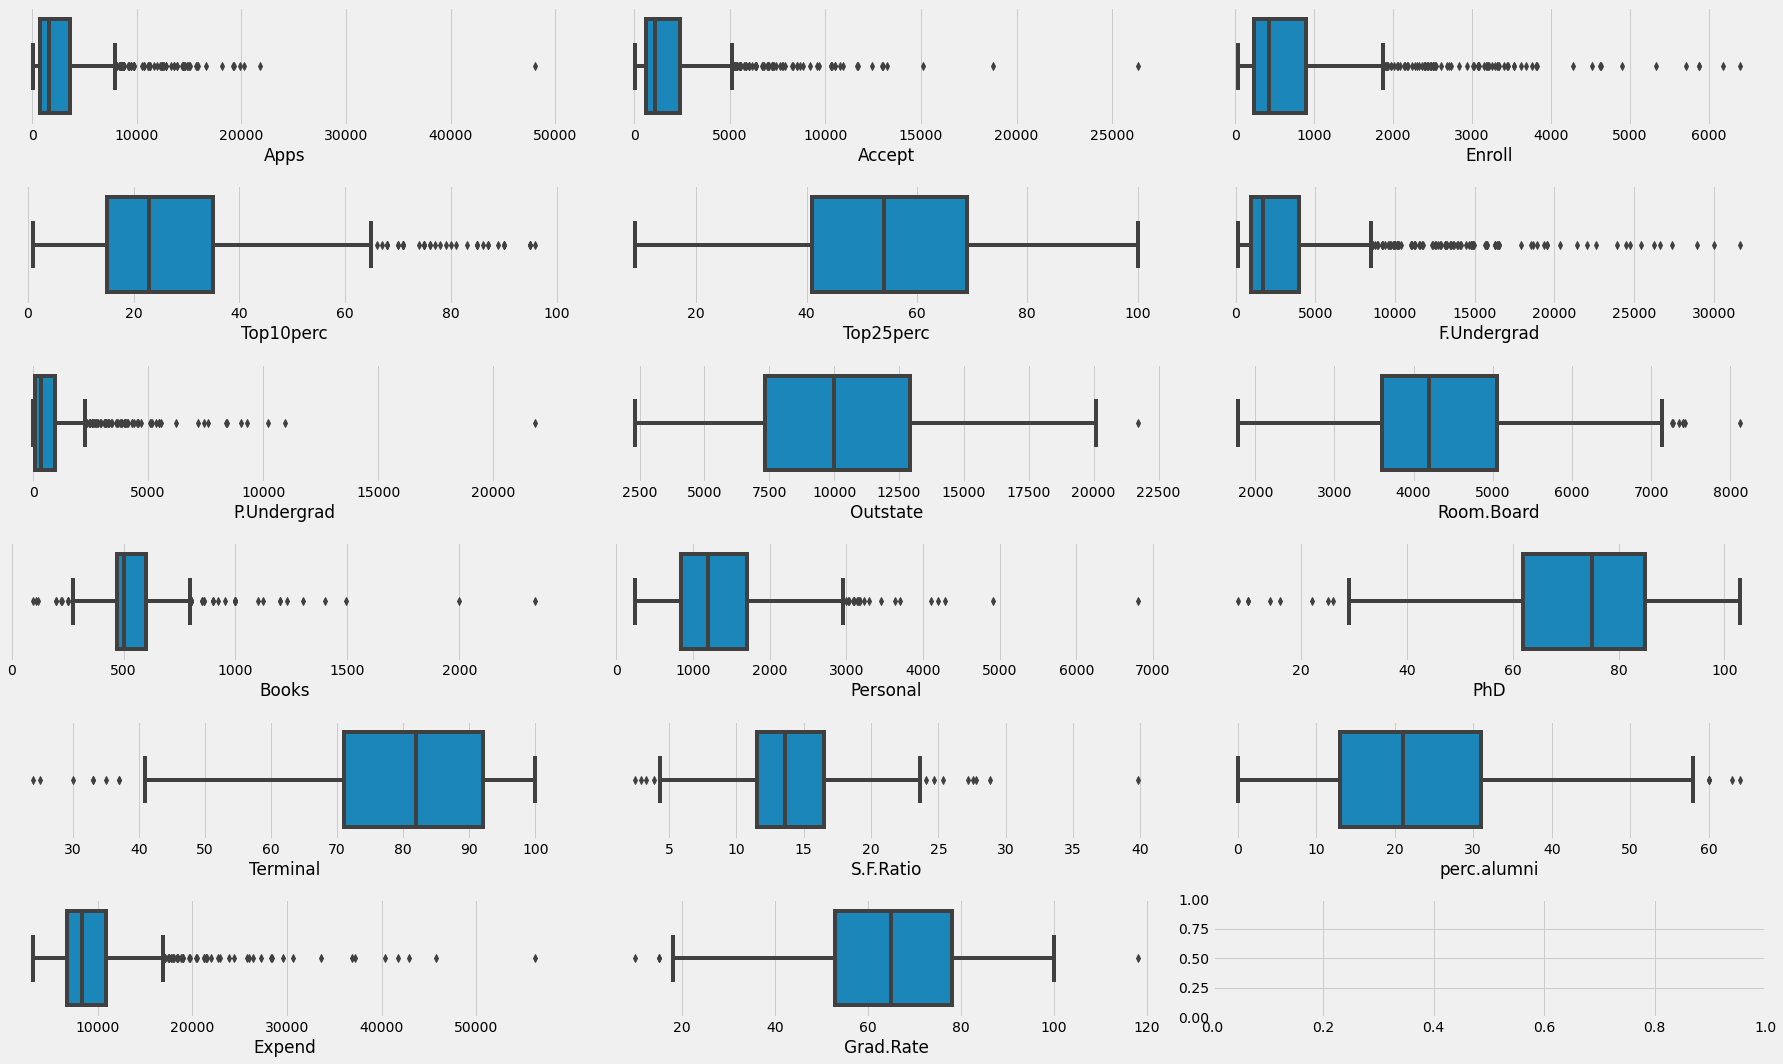

In [12]:
fig, axs = plt.subplots(6,3, figsize = (25,15))
plt1 = sns.boxplot(data['Apps'], ax = axs[0,0])
plt2 = sns.boxplot(data['Accept'], ax = axs[0,1])
plt3 = sns.boxplot(data['Enroll'], ax = axs[0,2])
plt4 = sns.boxplot(data['Top10perc'], ax = axs[1,0])
plt5 = sns.boxplot(data['Top25perc'], ax = axs[1,1])
plt6 = sns.boxplot(data['F.Undergrad'], ax = axs[1,2])
plt7 = sns.boxplot(data['P.Undergrad'], ax = axs[2,0])
plt8 = sns.boxplot(data['Outstate'], ax = axs[2,1])
plt9 = sns.boxplot(data['Room.Board'], ax = axs[2,2])
plt10 = sns.boxplot(data['Books'], ax = axs[3,0])
plt11 = sns.boxplot(data['Personal'], ax = axs[3,1])
plt12 = sns.boxplot(data['PhD'], ax = axs[3,2])
plt13 = sns.boxplot(data['Terminal'], ax = axs[4,0])
plt14 = sns.boxplot(data['S.F.Ratio'], ax = axs[4,1])
plt15 = sns.boxplot(data['perc.alumni'], ax = axs[4,2])
plt16 = sns.boxplot(data['Expend'], ax = axs[5,0])
plt17 = sns.boxplot(data['Grad.Rate'], ax = axs[5,1])



plt.tight_layout()
plt.show()

In [13]:
##Copy Data
data2=data.copy()

### Scaling the data

In [14]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
          'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
# Scale these variables using 'fit_transform'
data[varlist] = scaler.fit_transform(data[varlist])

## PCA on the Data

In [15]:
# Putting feature variable to X
X = data.drop(['college'],axis=1)

college = data['college']

In [16]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [17]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42)

#### PCA Component or Weight

In [18]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [19]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.248766,0.331598,Apps
1,0.207602,0.372117,Accept
2,0.176304,0.403724,Enroll
3,0.354274,-0.082412,Top10perc
4,0.344001,-0.044779,Top25perc
5,0.154641,0.417674,F.Undergrad
6,0.026443,0.315088,P.Undergrad
7,0.294736,-0.249644,Outstate
8,0.249030,-0.137809,Room.Board
9,0.064758,0.056342,Books


### Choose Number of PC


In [20]:
#Eigenvalue
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [21]:
#Proportion
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [22]:
#Cumulative Proportion
sum([0.32020628, 0.26340214, 0.06900917, 0.05922989,0.05488405,0.04984701])

0.81657854

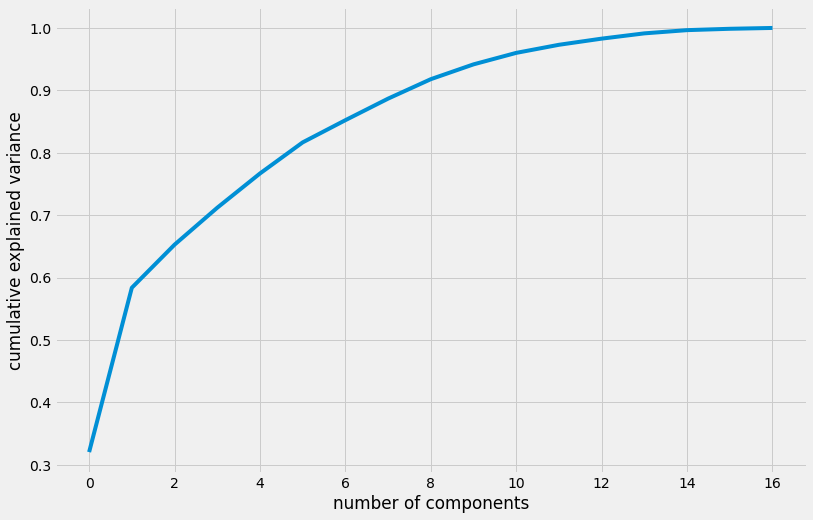

In [23]:
#Making the screeplot - plotting the cumulative variance against the number of components
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [24]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final= PCA(n_components=6,random_state=42)

#### Basis transformation - getting the data onto our PCs

In [25]:
df_pca = pca_final.fit_transform(X)

In [26]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5
0,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306
1,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177138
2,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592
3,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059509
4,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918


#### Creating correlation matrix for the principal components - we expect little to no correlation

<AxesSubplot:>

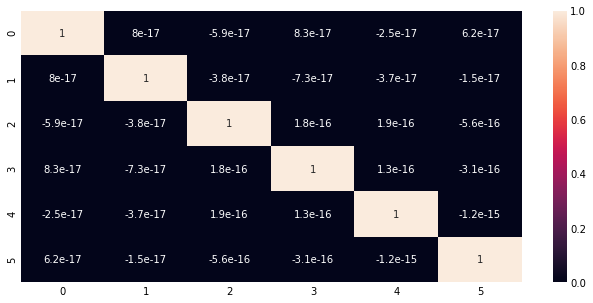

In [27]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(df_pca.corr(),annot = True)

## Hierarchical clustering

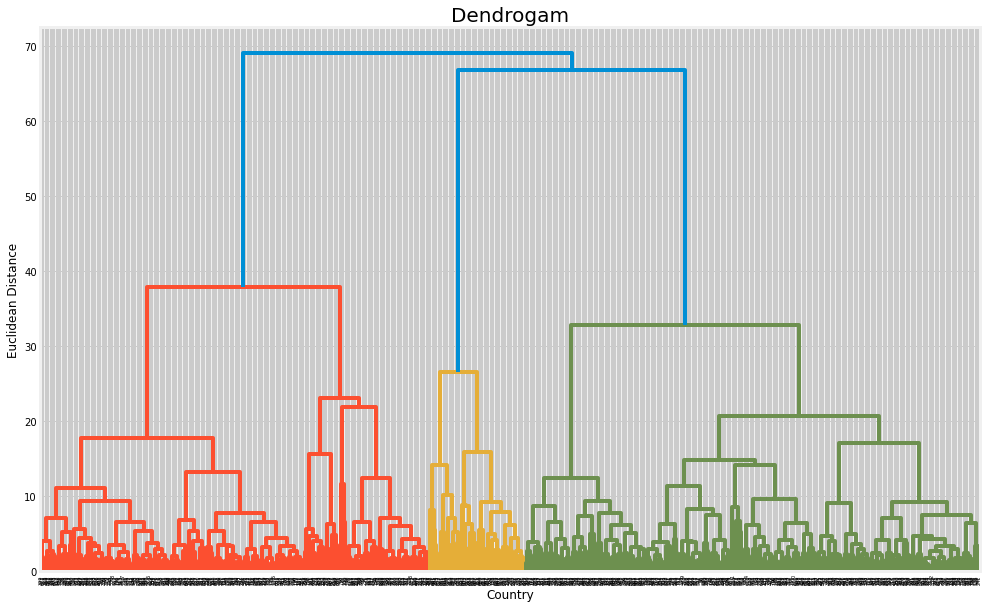

In [28]:
plt.figure(figsize=(15,10))
cluster=linkage(df_pca, method = 'ward',metric='euclidean')
dendrogram = dendrogram(cluster)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.show()

In [29]:
#Modeling Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters =3, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_pca)

In [30]:
#Add cluster result to Dataframe
df_pca['cluster']=cluster_hc
df_pca

,0,1,2,3,4,5,cluster
0,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306,1
1,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177138,1
2,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592,1
3,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059509,0
4,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918,1
...,...,...,...,...,...,...,...
772,-3.328458,1.220255,-0.383388,0.108555,0.776996,0.309429,1
773,0.199389,-0.686689,0.051564,0.562269,0.375191,0.373343,0
774,-0.732561,-0.077235,-0.000406,0.054316,-0.516021,0.468014,1
775,7.919327,-2.068329,2.073564,0.852054,-0.947755,-2.069937,0


In [31]:
#Merge Country and Cluster
pca_cluster_hc = pd.concat([data['college'],df_pca['cluster']], axis=1, join='outer')
pca_cluster_hc.head()

,college,cluster
0,Abilene Christian University,1
1,Adelphi University,1
2,Adrian College,1
3,Agnes Scott College,0
4,Alaska Pacific University,1


In [32]:
#Merge to Original Data
clustered_data_hc = pca_cluster_hc.merge(data2, on = 'college')
clustered_data_hc.head()

,college,cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [33]:
#See Characteristic of Cluster in each variables
hasil=clustered_data_hc.groupby(['cluster']).agg({"Apps":"mean","Accept":"mean","Enroll":"mean",
                                                 "Top10perc":"mean","Top25perc":"mean","F.Undergrad":"mean",
                                                 "P.Undergrad":"mean","Outstate":"mean","Room.Board":"mean",
                                                 "Books":"mean","Personal":"mean","PhD":"mean",
                                                 "Terminal":"mean","S.F.Ratio":"mean","perc.alumni":"mean",
                                                 "Expend":"mean","Grad.Rate":"mean"}).reset_index()
hasil

,cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,2529.381988,1570.018634,526.189441,38.698758,68.447205,2115.683230,325.453416,13723.524845,4952.338509,549.425466,1098.236025,81.270186,87.689441,11.966149,31.434783,12616.090062,76.658385
1,1,1818.172872,1305.872340,549.242021,16.946809,43.321809,2608.920213,749.425532,8103.965426,3900.473404,535.880319,1397.667553,62.797872,70.718085,15.512234,16.726064,7130.912234,57.122340
2,2,10559.227848,7241.227848,2912.544304,32.658228,63.607595,15349.670886,3518.822785,8181.443038,4108.443038,613.455696,2057.265823,84.506329,89.911392,15.974684,15.962025,9649.987342,59.531646


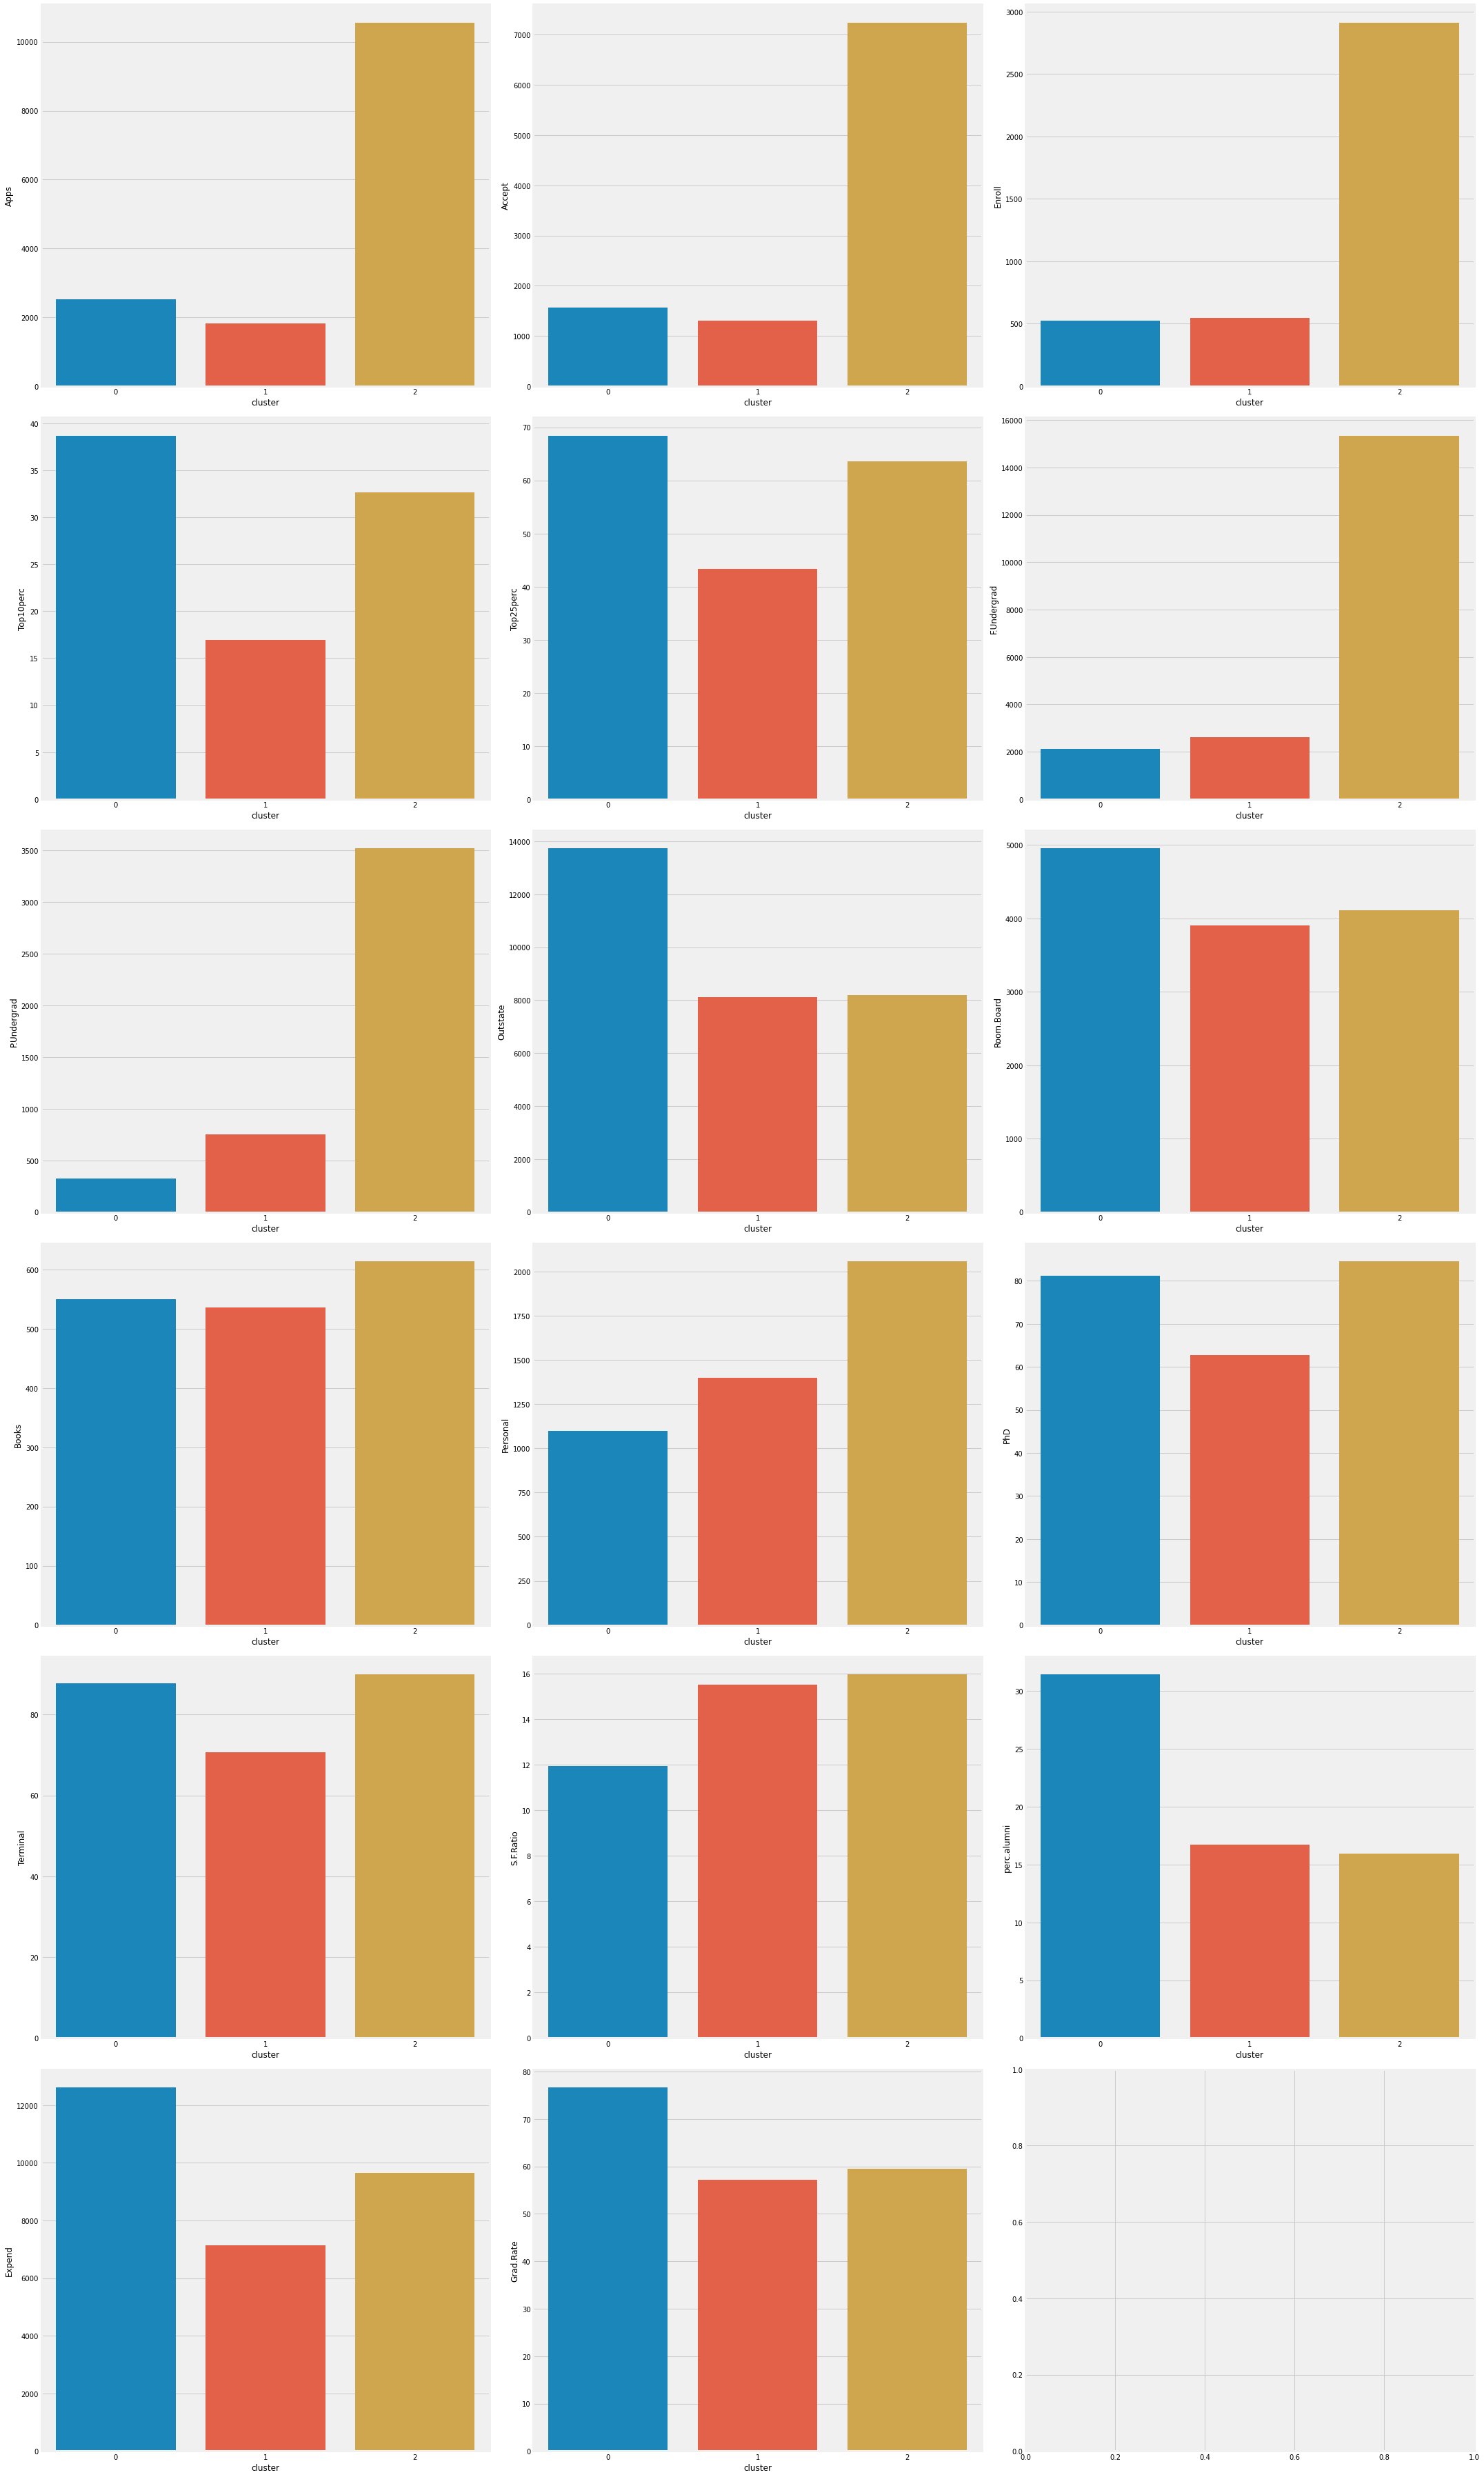

In [34]:
fig, axs = plt.subplots(6,3,figsize = (30,50))

sns.barplot(x=hasil.cluster, y=hasil.Apps, ax = axs[0,0])
sns.barplot(x=hasil.cluster, y=hasil.Accept, ax = axs[0,1])
sns.barplot(x=hasil.cluster, y=hasil.Enroll, ax = axs[0,2])
sns.barplot(x=hasil.cluster, y=hasil.Top10perc, ax = axs[1,0])
sns.barplot(x=hasil.cluster, y=hasil.Top25perc, ax = axs[1,1])
sns.barplot(x=hasil.cluster, y=hasil['F.Undergrad'], ax = axs[1,2])
sns.barplot(x=hasil.cluster, y=hasil['P.Undergrad'], ax = axs[2,0])
sns.barplot(x=hasil.cluster, y=hasil.Outstate, ax = axs[2,1])
sns.barplot(x=hasil.cluster, y=hasil['Room.Board'], ax = axs[2,2])
sns.barplot(x=hasil.cluster, y=hasil.Books, ax = axs[3,0])
sns.barplot(x=hasil.cluster, y=hasil.Personal, ax = axs[3,1])
sns.barplot(x=hasil.cluster, y=hasil.PhD, ax = axs[3,2])
sns.barplot(x=hasil.cluster, y=hasil.Terminal, ax = axs[4,0])
sns.barplot(x=hasil.cluster, y=hasil['S.F.Ratio'], ax = axs[4,1])
sns.barplot(x=hasil.cluster, y=hasil['perc.alumni'], ax = axs[4,2])
sns.barplot(x=hasil.cluster, y=hasil.Expend, ax = axs[5,0])
sns.barplot(x=hasil.cluster, y=hasil['Grad.Rate'], ax = axs[5,1])

plt.tight_layout()


In [35]:
clustered_data_hc[clustered_data_hc.cluster == 0].college.values

array(['Agnes Scott College', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alfred University', 'Allegheny College',
       'Allentown Coll. of St. Francis de Sales', 'Alma College',
       'Amherst College', 'Antioch University',
       'Arkansas College (Lyon College)', 'Assumption College',
       'Augustana College IL', 'Augustana College', 'Austin College',
       'Barat College', 'Bard College', 'Barnard College',
       'Beaver College', 'Bellarmine College', 'Beloit College',
       'Bentley College', 'Berry College', 'Birmingham-Southern College',
       'Blackburn College', 'Bluffton College', 'Bowdoin College',
       'Bradley University', 'Brandeis University', 'Bridgewater College',
       'Brown University', 'Bryn Mawr College', 'Bucknell University',
       'Buena Vista College', 'Butler University', 'Caldwell College',
       'Calvin College', 'Canisius College', 'Capital University',
       'Carleton College', 'Car

In [36]:
clustered_data_hc[clustered_data_hc.cluster == 1].college.values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Alaska Pacific University',
       'Alderson-Broaddus College', 'Alverno College',
       'American International College', 'Anderson University',
       'Andrews University', 'Angelo State University',
       'Appalachian State University', 'Aquinas College',
       'Arkansas Tech University', 'Augsburg College', 'Averett College',
       'Baker University', 'Baldwin-Wallace College', 'Barry University',
       'Baylor University', 'Belmont Abbey College', 'Belmont University',
       'Bemidji State University', 'Benedictine College',
       'Bennington College', 'Bethany College', 'Bethel College KS',
       'Bethel College', 'Bethune Cookman College',
       'Bloomsburg Univ. of Pennsylvania', 'Bluefield College',
       'Bradford College', 'Brenau University', 'Brewton-Parker College',
       'Briar Cliff College', 'Cabrini College',
       'California Lutheran University',
       'California Sta

In [37]:
clustered_data_hc[clustered_data_hc.cluster == 2].college.values

array(['Arizona State University Main campus',
       'Auburn University-Main Campus', 'Boston University',
       'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis', 'Clemson University',
       'Colorado State University', 'East Carolina University',
       'Florida International University', 'Florida State University',
       'Georgia Institute of Technology', 'Georgia State University',
       'Illinois State University', 'Indiana University at Bloomington',
       'Iowa State University', 'Kansas State University',
       'Louisiana State University at Baton Rouge',
       'Miami University at Oxford', 'Michigan State University',
       'North Carolina State University at Raleigh',
       'Northeastern University', 'Northern Arizona University',
       'Northern Illinois University', 'Ohio University',
       'Oklahoma State University', 'Pace University',
       'Pennsylvania State Univ. Main Campus',
       'Pu